# Names: Austin He, Maya Lee, Kevin Barcenas, Luis Gamino


In [20]:
# Standard Headers
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pandas import DataFrame
import numpy as np
import seaborn as sns
import plotly.express as px
import math as pi
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

# Pokebase is a Pokemon API that has extensive information about each pokemon
# https://pokeapi.co/docs/v2
#import pokebase as pb

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# print your pandas version
pd.__version__ 

'2.2.2'

# **Introduction**

### **Machine Learning Problem**
- What is the machine learning problem you are trying to solve?
- Why does this problem matter?
- What could the results of your predictive model be used for?
- Why is it important to predict the outcome you are focusing on?

### **Problem Statement**

The primary objective of this project is to classify Pokémon based on their attributes such as attack, defense, speed, and other statistics. Predicting Pokémon types has applications in game strategy optimization, character balancing, and understanding gameplay dynamics. By leveraging machine learning, we aim to build a model that accurately predicts a Pokémon's type, aiding players and game developers in decision-making.


### **Project Goal**
In this project, we aim to predict the type of a Pokémon based on its attributes such as attack, defense, speed, and other statistics. The dataset contains various details about Pokémon, including their type, stats, and additional features.

Understanding Pokémon types can provide insights into game strategy, character balancing, and player preferences.

---

### **Dataset Description**
The dataset used for this project is **`pokedex.csv`**, which contains data on various Pokemon. Below is a description of the dataset's features:

- **`images`**: Path to an image of the Pokemon, located in the 'images' folder.
- **`index`**: The unique number of each Pokemon in the Pokedex.
- **`Name`**: The name of the Pokemon.
- **`Type 1`**: The primary type of the Pokemon.
- **`Type 2`**: The secondary type of the Pokemon (nullable if the Pokemon has only one type).
- **`Total`**: The sum of all the Pokemon's stats.
- **`HP`**: Hit points or health; determines how much damage a Pokemon can withstand.
- **`Attack`**: The base value for normal attacks.
- **`Defense`**: The base resistance against normal attacks.
- **`SP. Atk`**: The base value for special attacks.
- **`SP. Def`**: The base resistance against special attacks.
- **`Speed`**: Determines which Pokemon attacks first during each round.

---


# Pokemon

In [21]:
data = pd.read_csv(r"C:\Users\kevin barcenas\Documents\GitHub\Pokemon_ML\pokedex.csv", skipinitialspace=True)
display(data.head())

,Image,Index,Name,Type 1,Type 2,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed
0,images/1.png,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,images/2.png,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,images/3.png,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,images/4.png,3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,images/5.png,4,Charmander,Fire,NaN,309,39,52,43,60,50,65


# Part 1: Data cleaning, Data Exploration, Feature Engineering, etc.

# Data Exploration

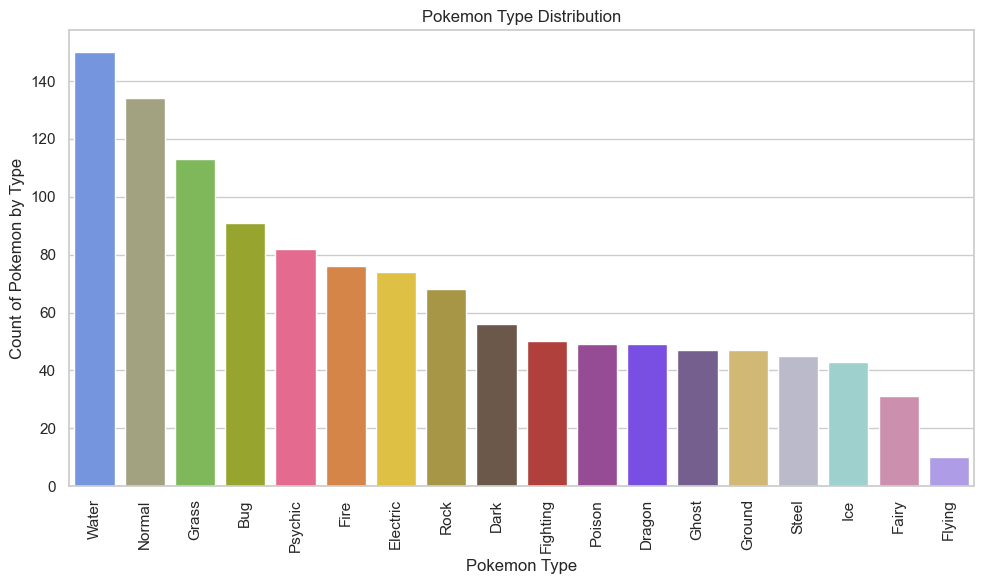

In [22]:
type_1 = ["Dragon", "Steel", "Flying", "Psychic", "Rock", "Fire", "Electric", "Dark", "Ghost", "Ground", "Ice", "Water", "Grass", "Fighting", "Fairy", "Poison", "Normal", "Bug"]
color = ["#6F35FC", "#B7B7CE", "#A98FF3", "#F95587", "#B6A136", "#EE8130", "#F7D02C", "#705746", "#735797", "#E2BF65", "#96D9D6", "#6390F0", "#7AC74C", "#C22E28", "#D685AD", "#A33EA1", "#A8A77A", "#A6B91A"]

col = pd.DataFrame({"Type 1": type_1, "color": color})

# count the total occurrences of each Type 1
type_counts = data['Type 1'].value_counts().reset_index()
type_counts.columns = ['Type 1', 'tot']
# merge
merged_data = pd.merge(type_counts, col, on='Type 1', how='left')
# plot the distribution of Pokémon types
plt.figure(figsize=(10, 6))

# Create a color mapping for each Type 1
color_mapping = dict(zip(merged_data['Type 1'], merged_data['color']))

# Create a bar plot for type distribution, using 'hue' to map 'Type 1' to colors
sns.barplot(x='Type 1', y='tot', data=merged_data, hue='Type 1', palette=color_mapping)

# Customize the plot
plt.xticks(rotation=90) 
plt.title("Pokemon Type Distribution")
plt.xlabel('Pokemon Type')
plt.ylabel('Count of Pokemon by Type')
sns.set_theme(style="whitegrid")

plt.tight_layout()
plt.show()

As seen above, there's a significantly larger amount of Water-type Pokémon when only considering the primary typing of a Pokémon. However, when dual types are taken into account, this dominance might shift, depending on the frequency of secondary types.

This is an important observation as it suggests a potential class imbalance in the dataset. Such imbalances could impact the performance of models trained on this data, especially if type-related features play a significant role in predictions. Proper preprocessing or class weighting may be required to address this issue effectively.

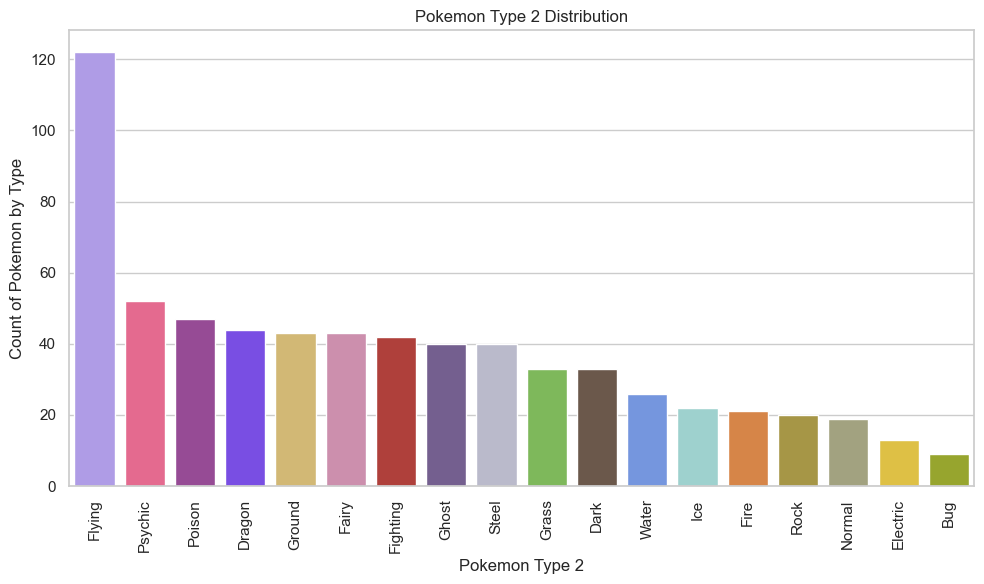

In [23]:
# Pokemon Type 2 distribution
col_2 = pd.DataFrame({"Type 2": type_1, "color": color})
type_2_counts = data['Type 2'].value_counts().reset_index()
type_2_counts.columns = ['Type 2', 'tot']
merged_data_2 = pd.merge(type_2_counts, col_2, on='Type 2', how='left')
color_mapping_2 = dict(zip(merged_data_2['Type 2'], merged_data_2['color']))


plt.figure(figsize=(10, 6))

sns.barplot(
    x='Type 2', 
    y='tot', 
    data=merged_data_2, 
    hue='Type 2', 
    palette=color_mapping_2
)

# Customize the plot
plt.xticks(rotation=90) 
plt.title("Pokemon Type 2 Distribution")
plt.xlabel('Pokemon Type 2')
plt.ylabel('Count of Pokemon by Type')
sns.set_theme(style="whitegrid")

plt.tight_layout()
plt.show()

**Secondary Pokémon Type Distribution:**

Flying-Type Prevalence: Flying is the most common secondary type by a large margin. This aligns with the fact that many Pokémon, such as birds and dragons, have Flying as their secondary type.
Balanced Distribution: Types like Psychic, Poison, Dragon, and Ground are moderately distributed as secondary types, showing a balance among secondary typings.
Rare Secondary Types: Bug, Electric, and Normal appear less frequently as secondary types, indicating these typings are uncommon as complements to primary types.

**General Observations:**

Class Imbalance: The clear dominance of certain types like Water (primary) and Flying (secondary) indicates a class imbalance in the dataset. This may require adjustment when training models to avoid bias.
Diversity in Typing: The distribution of primary and secondary types highlights the diversity of Pokémon typings, but some rare types like Ice, Fairy, and Flying (as primary) and Bug or Electric (as secondary) are underrepresented.
Flying as a Secondary Type: The exceptionally high frequency of Flying as a secondary type could be due to many Pokémon in the "bird" archetype being dual Flying types.

*What we've proposed is applying a sort of weight to the primary and secondary (if any) types of pokemons.*

Option 1: Equal Weight for Dual Types (0.5/0.5)
>Treats both typings equally, which is straightforward and ensures every Pokémon contributes to both categories. May dilute the effect of the primary type, which often has a stronger influence on stats.

Option 2: More Weight for Primary Type (e.g., 0.7 Primary / 0.3 Secondary)
>Reflects that primary type is usually the main determinant of stat tendencies. This could improve prediction accuracy by aligning better with design patterns. Might undervalue the influence of the secondary type, especially for Pokémon whose secondary type significantly impacts their stats (e.g., Dragon/Flying Pokémon).

Option 3: Context-Specific Weighting: Dynamic Weighting Approach

This approach assigns weights dynamically based on stat contributions of primary and secondary types:

1. **Analyze Single-Type Pokémon Stats**:  
   - Compute average stats for Pokémon with a single type to establish a baseline.

2. **Compare Dual-Type Stats**:  
   - Identify differences in stats (e.g., Speed, Attack) between single-type Pokémon and those with specific dual typings.

3. **Adjust Weights**:  
   - Significant impact → Use a balanced split (e.g., 0.5/0.5).  
   - Minimal impact → Favor the primary type (e.g., 0.7/0.3).

**Example: Fire Type with Electric Secondary**
- **Step 1**: Calculate average stats for all Fire-type Pokémon (e.g., high Special Attack).  
- **Step 2**: Compare with Fire/Electric Pokémon. If Electric boosts Speed, assign higher weight to the secondary type.  
- **Step 3**: Adjust: Significant Speed → 0.5/0.5 split; Minimal Speed → 0.7/0.3 split favoring Fire.

**Benefits**
- **Stat-Based Precision**: Weights reflect real stat contributions.  
- **Flexibility**: Adapts to specific archetypes (e.g., Dragon/Flying vs. Water/Fairy).  
- **Diversity Preservation**: Ensures no type is overlooked while prioritizing primary types.



The code creates radar charts for each Pokémon type (grouped by Type 1) to visualize the average characteristics (e.g., HP, Attack, Defense, etc.) of Pokémon having that primary type. It organizes these radar charts into a grid layout, enabling easy comparison between types. Displays the average values of key features.

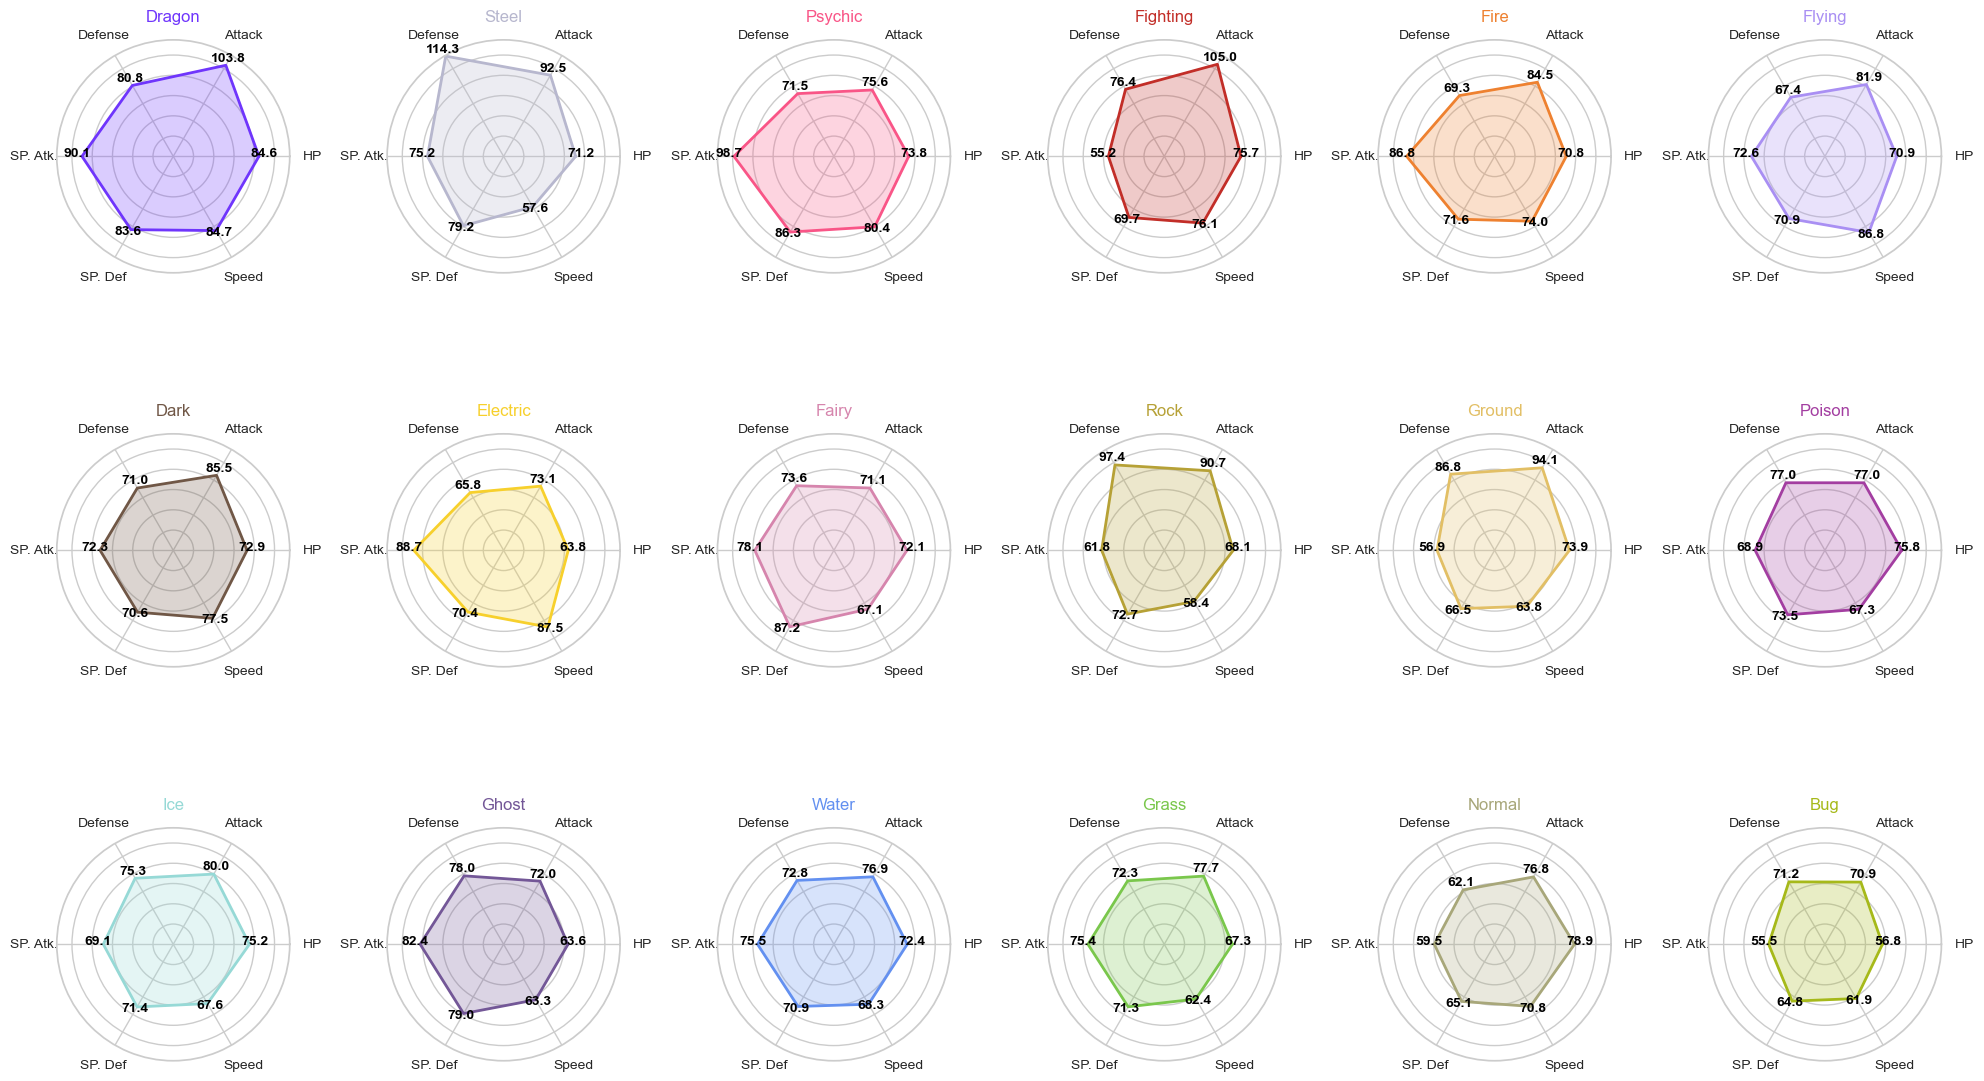

In [24]:
# calculate mean of each feature grouped by Type 1
feature_columns = ['HP', 'Attack', 'Defense', 'SP. Atk.', 'SP. Def', 'Speed']
res = data[feature_columns + ['Type 1']].groupby('Type 1').mean()

# add a sum of all features for sorting
res['sumChars'] = res.sum(axis=1)
# sort by the sum of characteristics
res = res.sort_values(by='sumChars', ascending=False)
# merge color information based on 'Type 1'
res = pd.merge(res, col, on='Type 1', how='left')

# Nnormalize the max and min values for the radar chart
max_values = np.ceil(res[feature_columns].max(axis=0)).values
min_values = np.zeros(len(feature_columns))

# function to create radar charts
def radar_chart(data, color, features, max_values, min_values, ax):
    categories = features
    N = len(categories)
    
    # compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    values = data[categories].values.tolist()
    
    # complete the values to form a closed polygon
    values += values[:1]
    angles += angles[:1]
    
    ax.fill(angles, values, color=color, alpha=0.25)
    ax.plot(angles, values, color=color, linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_ylim(min_values.min(), max_values.max())
    
    
    for i, value in enumerate(values[:-1]):
        ax.text(angles[i], value + 5, f"{value:.1f}", horizontalalignment='center', size=10, color='black', weight='bold')
    
# create radar charts for each Pokémon type
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(20, 12), subplot_kw=dict(polar=True))
fig.subplots_adjust(hspace=0.5)

for i, (index, row) in enumerate(res.iterrows()):
    row_data = row[feature_columns]
    color = row['color']
    
    # Calculate grid position
    ax = axes[i // 6, i % 6]  # Use integer division and modulus to place charts in grid
    
    # Generate radar chart
    radar_chart(row, color, feature_columns, max_values, min_values, ax)
    
    # Set the title of each subplot to the Type 1 name using row.name
    title = row['Type 1']
    ax.set_title(title, size=12, color=color)  # `index` is the Pokémon type (row name)

if len(res) < 18:
    for j in range(len(res), 18):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


### Data Cleaning
Here, we clean the dataset by:
- Merging "Type 1" and "Type 2" columns to create a combined "Types" column.
- Removing unnecessary columns, such as "Image" and "Index".
- Adding height and weight information from an external source (processed locally).


In [25]:
data.fillna({"Type 2":""}, inplace=True)
types = data['Type 1'] + " " + data['Type 2']
#inserting merged columns into the data set
data.insert(5, "Types", types)
display(data.head())


,Image,Index,Name,Type 1,Type 2,Types,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed
0,images/1.png,1,Bulbasaur,Grass,Poison,Grass Poison,318,45,49,49,65,65,45
1,images/2.png,2,Ivysaur,Grass,Poison,Grass Poison,405,60,62,63,80,80,60
2,images/3.png,3,Venusaur,Grass,Poison,Grass Poison,525,80,82,83,100,100,80
3,images/4.png,3,Venusaur Mega Venusaur,Grass,Poison,Grass Poison,625,80,100,123,122,120,80
4,images/5.png,4,Charmander,Fire,,Fire,309,39,52,43,60,50,65


### Adding Height and Weight Data to the Pokémon Dataset

Height (in meters) and weight (in kilograms) are additional features obtained from the **PokeAPI**. 

- Since querying the API for all Pokémon is time-intensive, the data extraction was completed locally, and the results were saved as a CSV file (`height_weight.csv`).
- Below is the process used for data extraction (commented-out script for reference).
- The final step reads the locally saved `height_weight.csv` file and extracts only the `Height` and `Weight` columns to merge with the main dataset.


In [26]:
# Adding weight and height in the data. This information is coming from the PokeAPI 
# Due to time consuming script to obtain the height and weight of the pokemons the
# data extraction was done locally and will be added as a csv file. 
# The script will be below

# data['Height'] = np.nan
# data['Weight'] = np.nan

# for index, row in df.iterrows():
#     pokemon_name = row['Name'].lower()
#     try:
#         current_pokemon = pb.pokemon(pokemon_name)
#         df.at[index, 'Height'] = current_pokemon.height
#         df.at[index, 'Weight'] = current_pokemon.weight
#     except Exception as e:
#         df.at[index, 'Height'] = np.nan
#         df.at[index, 'Weight'] = np.nan
# df.to_csv("pokemon_csv_with_heightweight.csv", index=False)
        
# Read the pre-saved height and weight data
height_weight_data = pd.read_csv(r"C:\Users\kevin barcenas\Documents\GitHub\Pokemon_ML\height_weight.csv",encoding="latin1")

# Extract only the height and weight columns
ht_wt = height_weight_data.iloc[:, -2:]

data['Height'] = ht_wt['Height'].dropna()
data['Weight'] = ht_wt['Weight'].dropna()

data['Height'] = data['Height'].astype(float)
data['Weight'] = data['Weight'].astype(float)
# Display the updated data
display(data)

            

,Image,Index,Name,Type 1,Type 2,Types,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed,Height,Weight
0,images/1.png,1,Bulbasaur,Grass,Poison,Grass Poison,318,45,49,49,65,65,45,0.7,6.9
1,images/2.png,2,Ivysaur,Grass,Poison,Grass Poison,405,60,62,63,80,80,60,1.0,13.0
2,images/3.png,3,Venusaur,Grass,Poison,Grass Poison,525,80,82,83,100,100,80,2.0,100.0
3,images/4.png,3,Venusaur Mega Venusaur,Grass,Poison,Grass Poison,625,80,100,123,122,120,80,2.4,155.5
4,images/5.png,4,Charmander,Fire,,Fire,309,39,52,43,60,50,65,0.6,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,images/1211.png,1023,Iron Crown,Steel,Psychic,Steel Psychic,590,90,72,100,122,108,98,1.6,156.0
1211,images/1212.png,1024,Terapagos Normal Form,Normal,,Normal,450,90,65,85,65,85,60,0.2,6.5
1212,images/1213.png,1024,Terapagos Terastal Form,Normal,,Normal,600,95,95,110,105,110,85,0.3,16.0
1213,images/1214.png,1024,Terapagos Stellar Form,Normal,,Normal,700,160,105,110,130,110,85,1.7,77.0


In [27]:
# Data Cleaning: Remove Image column and Index column

data.dropna(inplace=True) # dropping pokemons without height and weight
first_type_label = data['Type 1']
data.drop("Image", axis=1, inplace=True) # Drop image column, not necessary for models
data.drop("Index", axis=1, inplace=True) # Drop the Index column, inputting ordered information could mess up the model
data.drop("Type 1", axis=1, inplace=True)
data.drop("Type 2", axis=1, inplace=True)
data.drop("Name", axis=1, inplace=True)
data.drop("Total", axis=1, inplace =True) # Uncomment for later since its a total of all the other columns

#Separating Labels and Features
class_labels = data['Types']
features = data.copy(deep=True)
features.drop('Types', axis=1, inplace=True) #
display(features.head())
display(class_labels)

,HP,Attack,Defense,SP. Atk.,SP. Def,Speed,Height,Weight
0,45,49,49,65,65,45,0.7,6.9
1,60,62,63,80,80,60,1.0,13.0
2,80,82,83,100,100,80,2.0,100.0
3,80,100,123,122,120,80,2.4,155.5
4,39,52,43,60,50,65,0.6,8.5


0        Grass Poison
1        Grass Poison
2        Grass Poison
3        Grass Poison
4               Fire 
            ...      
1210    Steel Psychic
1211          Normal 
1212          Normal 
1213          Normal 
1214     Poison Ghost
Name: Types, Length: 1214, dtype: object

## Feature Exploring 

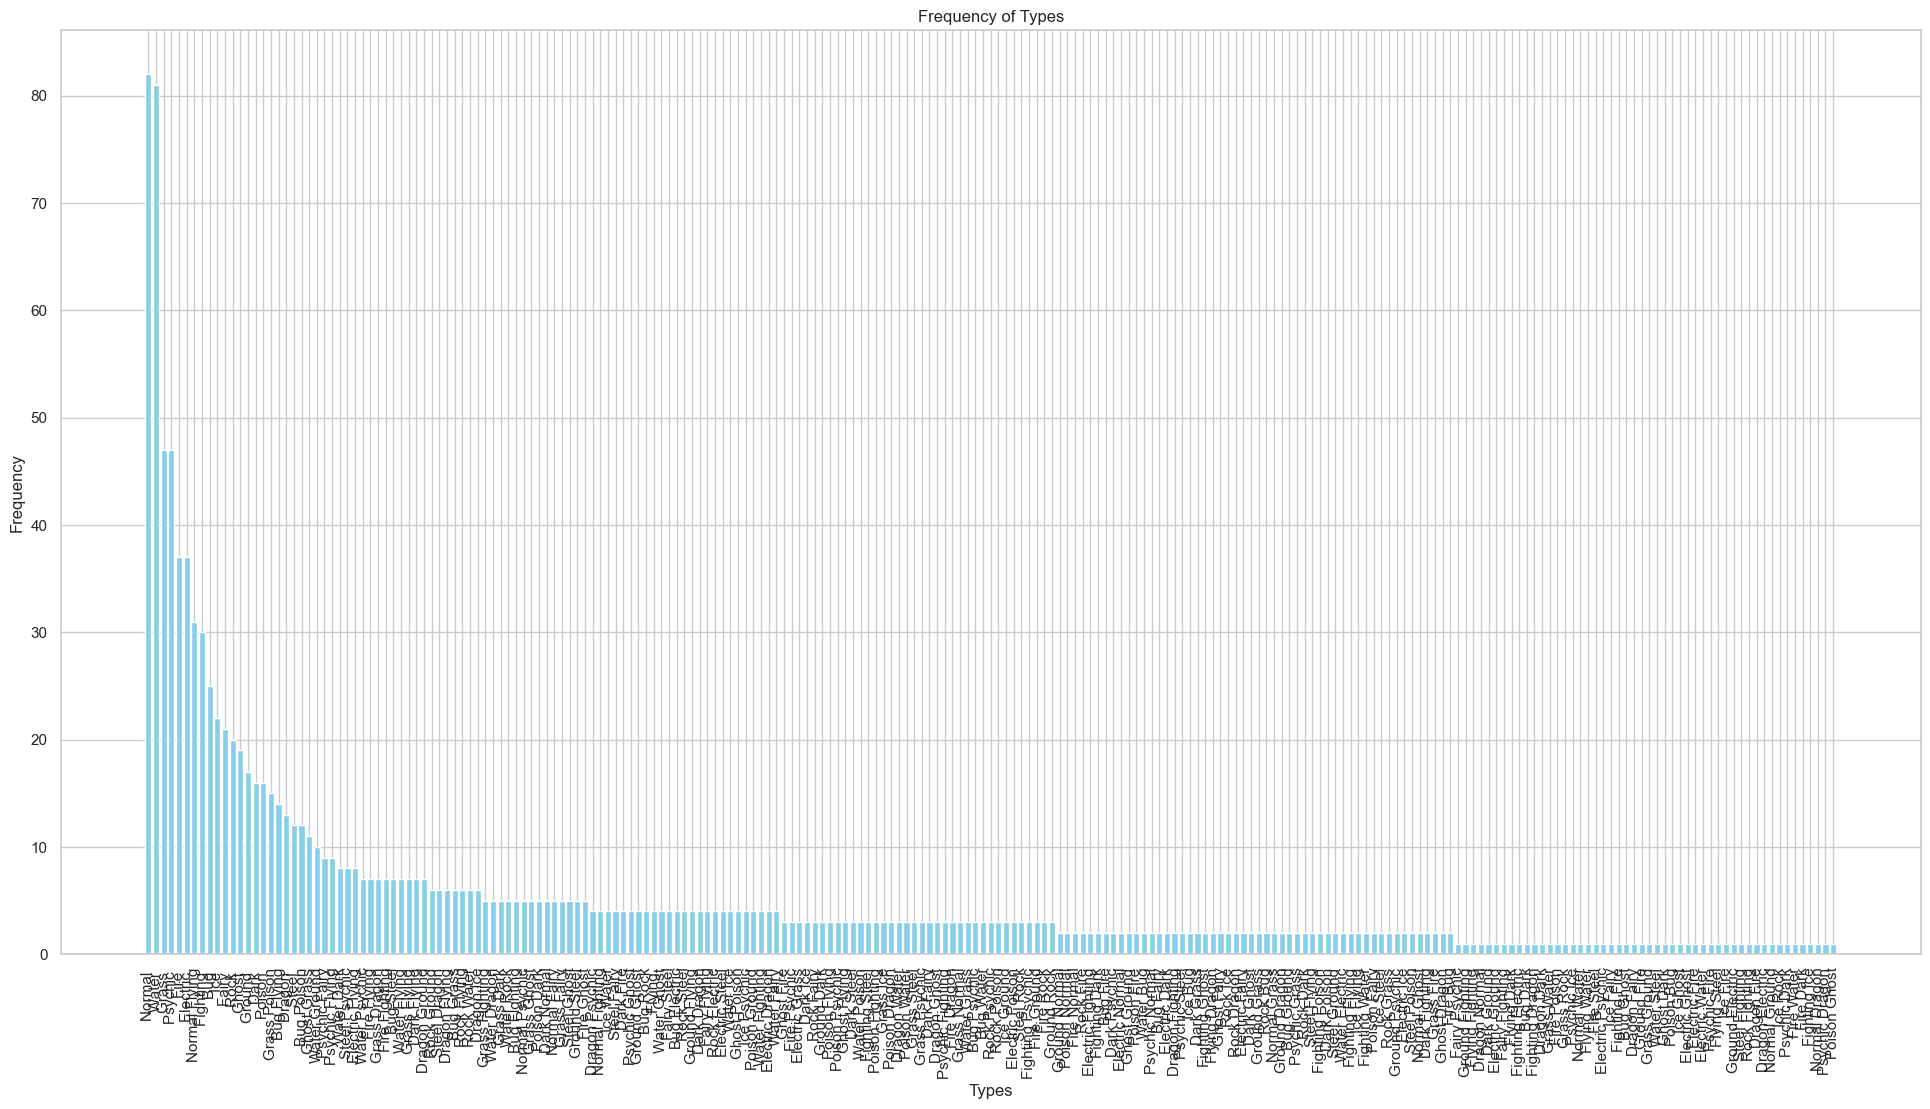

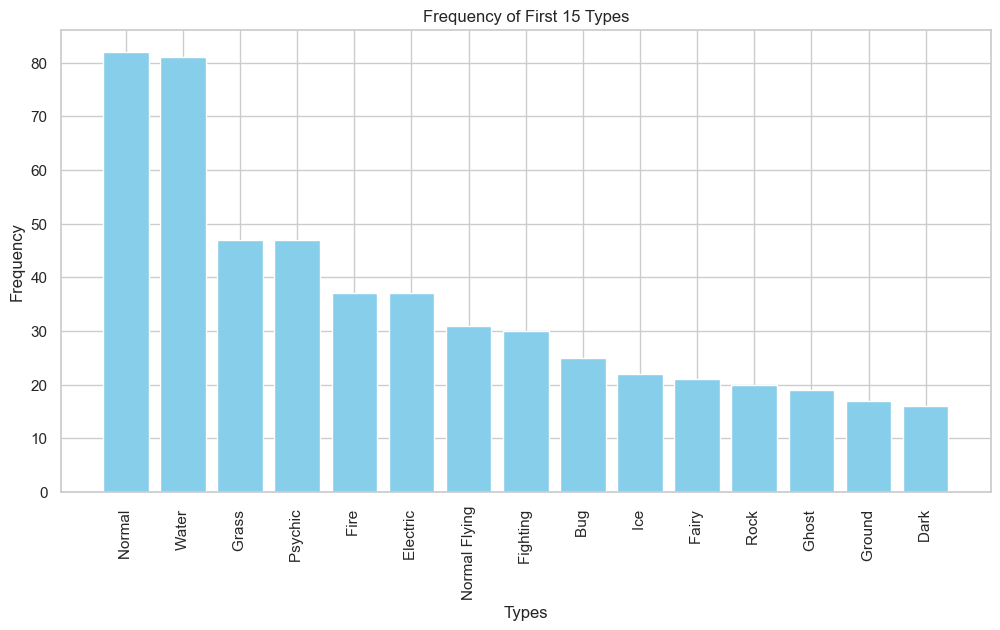

In [28]:
#Frequency of different Types
types_frequency = class_labels.value_counts()
plt.figure(figsize=(24, 12))
plt.bar(types_frequency.index, types_frequency.values, color='skyblue')
plt.xticks(rotation=90) 
plt.xlabel('Types')
plt.ylabel('Frequency')
plt.title('Frequency of Types')
plt.show()
#Plot of the first 15 frequent type
first_fifteen = types_frequency[:15]
plt.figure(figsize=(12, 6))
plt.bar(first_fifteen.index, first_fifteen.values, color='skyblue')
plt.xticks(rotation=90) 
plt.xlabel('Types')
plt.ylabel('Frequency')
plt.title('Frequency of First 15 Types')
plt.show()

In [29]:
#Printing the data of types statistics
types_data =  data.groupby('Types')
types_data.describe()

HP                                                          \
              count       mean        std   min    25%   50%     75%    max   
Types                                                                         
Bug            25.0  48.920000  13.372609  25.0  40.00  47.0   50.00   80.0   
Bug Dark        1.0  71.000000        NaN  71.0  71.00  71.0   71.00   71.0   
Bug Electric    4.0  63.500000  12.233833  50.0  55.25  63.5   71.75   77.0   
Bug Fairy       2.0  50.000000  14.142136  40.0  45.00  50.0   55.00   60.0   
Bug Fighting    5.0  84.600000  13.501852  71.0  80.00  80.0   85.00  107.0   
...             ...        ...        ...   ...    ...   ...     ...    ...   
Water Ice       4.0  90.000000  32.659863  50.0  80.00  90.0  100.00  130.0   
Water Poison    3.0  61.666667  20.207259  40.0  52.50  65.0   72.50   80.0   
Water Psychic   7.0  84.714286  14.511080  60.0  79.00  90.0   95.00   95.0   
Water Rock      5.0  76.600000  18.568791  54.0  65.00  74.0   90.00  100.0   
Water Steel     1.0  84.000000        NaN  84.0  84.00  84.0   84.00   84.0   

              Attack              ... Height      Weight              \
               count        mean  ...    75%  max  count        mean   
Types                             ...                                  
Bug             25.0   48.480000  ...  0.700  1.5   25.0   10.324000   
Bug Dark         1.0  102.000000  ...  1.000  1.0    1.0   17.500000   
Bug Electric     4.0   69.000000  ...  0.975  1.5    4.0   17.600000   
Bug Fairy        2.0   50.000000  ...  0.175  0.2    2.0    0.350000   
Bug Fighting     5.0  144.200000  ...  2.400  3.2    5.0  113.420000   
...              ...         ...  ...    ...  ...    ...         ...   
Water Ice        4.0   85.000000  ...  2.125  2.5    4.0  161.875000   
Water Poison     3.0   68.333333  ...  1.250  1.6    3.0   34.800000   
Water Psychic    7.0   81.714286  ...  2.000  2.5    7.0   71.857143   
Water Rock       5.0   89.200000  ...  1.000  1.2    5.0   48.280000   
Water Steel      1.0   86.000000  ...  1.700  1.7    1.0   84.500000   

                                                                   
                      std    min      25%     50%      75%    max  
Types                                                              
Bug             11.663343    1.0    3.400    7.20   11.500   55.0  
Bug Dark              NaN   17.5   17.500   17.50   17.500   17.5  
Bug Electric    19.157766    0.6    8.025   12.40   21.975   45.0  
Bug Fairy        0.212132    0.2    0.275    0.35    0.425    0.5  
Bug Fighting   125.379153   25.0   54.000   62.50   92.000  333.6  
...                   ...    ...      ...     ...      ...    ...  
Water Ice       45.340150  120.0  129.375  153.75  186.250  220.0  
Water Poison    27.178484    3.9   24.700   45.50   50.250   55.0  
Water Psychic   33.900239   19.0   57.250   79.50   85.000  120.0  
Water Rock      47.674071    5.0   16.500   23.40   81.000  115.5  
Water Steel           NaN   84.5   84.500   84.50   84.500   84.5  

[221 rows x 64 columns]

In [30]:

#Printing the mean according to stat in relevance to the types
columns_of_interest = ['HP', 'Attack', 'Defense', 'SP. Atk.', 'SP. Def', 'Speed', 'Height', 'Weight']

for column in columns_of_interest:
    col_by_type = types_data[column]
    type_mean = col_by_type.mean()
    type_mean = type_mean.sort_values(ascending=False)
    print(f"Mean value of {column}: {type_mean}")



Mean value of HP: Types
Dark Ground          155.000000
Fighting Electric    154.000000
Ghost Dragon         150.000000
Ground Normal        121.500000
Psychic Steel        117.000000
                        ...    
Bug Water             46.666667
Bug Ground            45.500000
Normal Ghost          45.000000
Poison Bug            40.000000
Bug Ghost              1.000000
Name: HP, Length: 221, dtype: float64
Mean value of Attack: Types
Ground Fire        180.000000
Psychic Dragon     167.000000
Psychic Ice        165.000000
Ice Fire           160.000000
Psychic Dark       160.000000
                      ...    
Electric Normal     46.500000
Ice Bug             45.000000
Normal Fairy        45.000000
Bug Psychic         43.333333
Ghost Fire          41.666667
Name: Attack, Length: 221, dtype: float64
Mean value of Defense: Types
Steel Ground       215.000000
Ice Rock           184.000000
Rock Steel         160.500000
Ground Fire        160.000000
Poison Ghost       160.000000
       

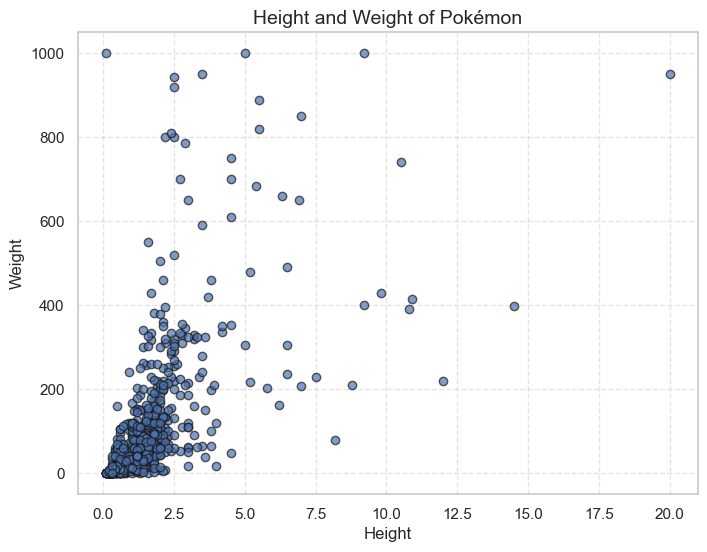

In [31]:
# Seeing if there is a correlation between height and weight
plt.figure(figsize=(8, 6))  
plt.scatter(data['Height'], data['Weight'], alpha=0.7, edgecolor='k')
plt.xlabel('Height', fontsize=12)
plt.ylabel('Weight', fontsize=12)
plt.title("Height and Weight of Pokémon", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5) 
plt.show()

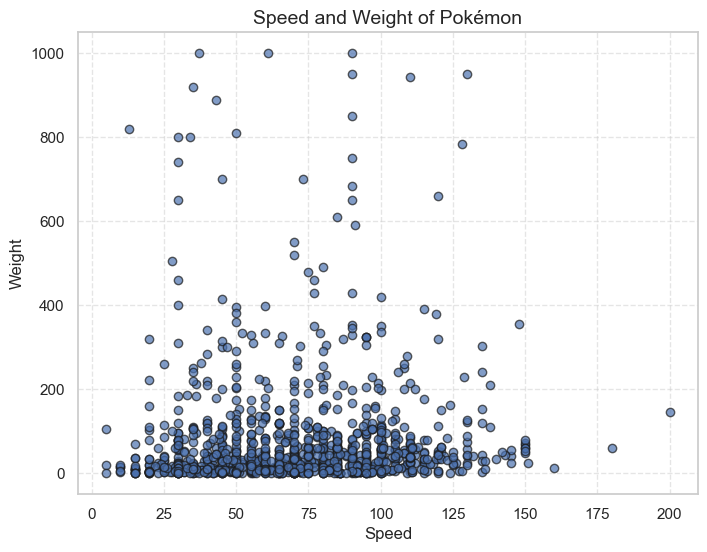

In [32]:
# Correlation between speed and weight
plt.figure(figsize=(8, 6))  
plt.scatter(data['Speed'], data['Weight'], alpha=0.7, edgecolor='k') 
plt.xlabel('Speed', fontsize=12)
plt.ylabel('Weight', fontsize=12)
plt.title("Speed and Weight of Pokémon", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5) 
plt.show()

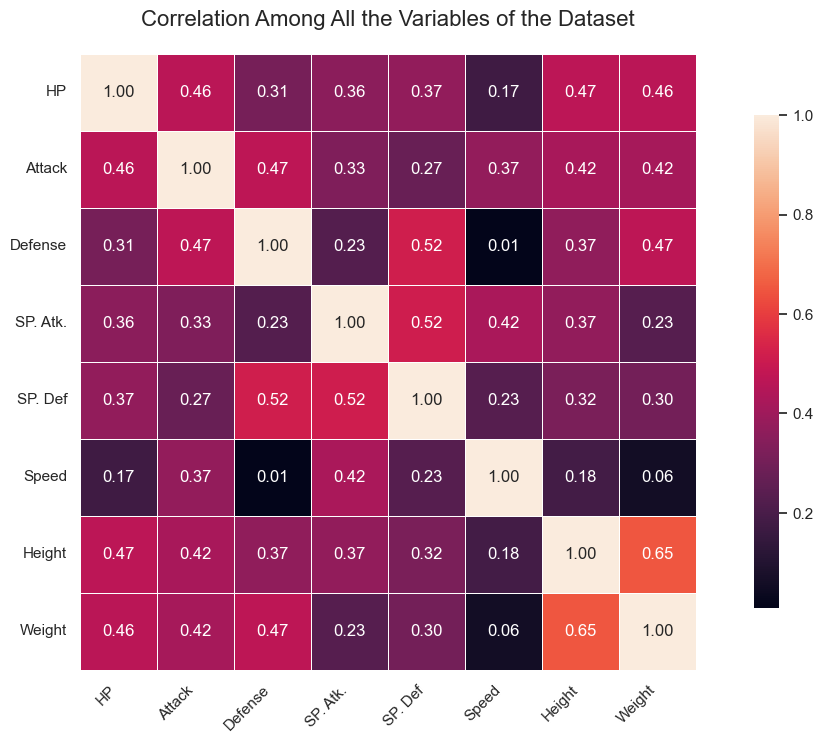

In [33]:
# Correlation Matrix between numerical columns
cor = features.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(
    cor, 
    annot=True,         
    fmt=".2f",         
    xticklabels=cor.columns, 
    yticklabels=cor.columns,
    square=True,      
    linewidths=0.5,   
    cbar_kws={"shrink": 0.8}  
)
plt.title("Correlation Among All the Variables of the Dataset", fontsize=16, pad=20)  
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0) 
plt.show()

# Part 2: Modeling
Trying to predict what type a pokemon would be depending on their statistics.
### Classifers:
- K nearest neighbors
- Decision Trees
- Random Forest
- Naive Bayes
- AdaBoost
- Neural Networks
- Stacking


In [34]:
# One Hot
one_hot_labels = pd.get_dummies(class_labels)
display(one_hot_labels)

# One Hot Encoding First
one_hot_first = pd.get_dummies(first_type_label)
display(one_hot_first)

,Bug,Bug Dark,Bug Electric,Bug Fairy,Bug Fighting,Bug Fire,Bug Flying,Bug Ghost,Bug Grass,Bug Ground,...,Water Fighting,Water Flying,Water Ghost,Water Grass,Water Ground,Water Ice,Water Poison,Water Psychic,Water Rock,Water Steel
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1211,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1212,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1213,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1211,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1212,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1213,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


#### K nearest Neighbors

In [35]:
knn = KNeighborsClassifier()
scaler = StandardScaler()
pipe = Pipeline([
    ('scaler', scaler),
    ('knn', knn)
])

param_grid = {
    'knn__n_neighbors': list(range(1, 25))
}

# Finding the best number of nearest neighbors
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
#grid_search.fit(features, one_hot_labels) Includes both "Types"
grid_search.fit(features, one_hot_first) # Primary "type"
print(grid_search.best_params_)
print("Accuracy:", grid_search.best_score_*100)

# Cross validating CV = 5 because 10 is taking long
#nested_score = cross_val_score(grid_search, features, one_hot_labels, cv=5)    
nested_score = cross_val_score(grid_search, features, one_hot_first, cv=5) # Primary "Type"
print("Accuracy:", nested_score.mean()*100)

{'knn__n_neighbors': 1}
Accuracy: 14.825698058021292
Accuracy: 14.825698058021292


### Decision Trees

In [36]:
clf = DecisionTreeClassifier()

# No real reason for these numebers
params = {"max_depth": [5,19,15,20], 
          "min_samples_leaf": [5,19,15,20],
          "max_features": ['sqrt', 'log2'] }

# Do not have to scale are data because using decision trees
grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy')
#grid_search.fit(features, one_hot_labels) Includes both "Types"
grid_search.fit(features, first_type_label) # Primary "type"
print(grid_search.best_params_)
print("Accuracy:", grid_search.best_score_*100)

#nested_score = cross_val_score(grid_search, features, one_hot_labels, cv=10)    
nested_score = cross_val_score(grid_search, features, first_type_label, cv=10) # Primary "Type"                                      
print("Accuracy:", nested_score.mean()*100)

{'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 15}
Accuracy: 16.8013468013468
Accuracy: 14.404552228695295


### Random Forest

In [37]:
randomtree = RandomForestClassifier()

param_grid = {
    'max_depth': list(range(1, 10)),
    'min_samples_leaf': [5, 8, 10],
    'max_features': ['sqrt', 'log2']
}

# Do not have to scale are data because using decision trees
grid_search = GridSearchCV(randomtree, param_grid, cv=5, scoring='accuracy')
#grid_search.fit(features, one_hot_labels) Includes both "Types"
grid_search.fit(features, first_type_label) # Primary "type"
print(grid_search.best_params_)
print("Accuracy:", grid_search.best_score_*100)

#nested_score = cross_val_score(grid_search, features, one_hot_labels, cv=10)    
nested_score = cross_val_score(grid_search, features, first_type_label, cv=5) # Primary "Type"                                        
print("Accuracy:", nested_score.mean()*100)

{'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 10}
Accuracy: 22.73407475427678
Accuracy: 21.826344250586676


### Naive Bayes

In [38]:
clf = GaussianNB()
scores = cross_val_score(clf, features, first_type_label, cv=10)
print("Accuracy:", scores.mean()*100)
predictions = cross_val_predict(clf, features, first_type_label, cv=10)
matrix = confusion_matrix(first_type_label, predictions)
print(classification_report(first_type_label, predictions))

Accuracy: 15.89418777943368
              precision    recall  f1-score   support

         Bug       0.13      0.51      0.20        91
        Dark       0.00      0.00      0.00        56
      Dragon       0.18      0.22      0.20        49
    Electric       0.19      0.27      0.22        74
       Fairy       0.09      0.03      0.05        31
    Fighting       0.18      0.26      0.21        50
        Fire       0.17      0.17      0.17        76
      Flying       0.00      0.00      0.00        10
       Ghost       0.00      0.00      0.00        47
       Grass       0.15      0.19      0.17       113
      Ground       0.20      0.09      0.12        47
         Ice       0.00      0.00      0.00        43
      Normal       0.22      0.28      0.24       134
      Poison       0.00      0.00      0.00        48
     Psychic       0.16      0.09      0.11        82
        Rock       0.14      0.07      0.10        68
       Steel       0.26      0.20      0.23        45

C:\Users\kevin barcenas\Downloads\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kevin barcenas\Downloads\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kevin barcenas\Downloads\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

### AdaBoost

In [39]:
adaboost = AdaBoostClassifier()

param_grid = {
    'n_estimators': [50, 70, 90, 120, 180, 200]
}

# Do not have to scale are data because using decision trees
grid_search = GridSearchCV(adaboost, param_grid, cv=5, scoring='accuracy')
#grid_search.fit(features, one_hot_labels) Includes both "Types"
# Used the categorical labels since AdaBoost only accepts 1D Array
grid_search.fit(features, first_type_label) # Primary "type"
print(grid_search.best_params_)
print("Accuracy:", grid_search.best_score_*100)

#nested_score = cross_val_score(grid_search, features, one_hot_labels, cv=10)    
nested_score = cross_val_score(grid_search, features, first_type_label, cv=10) # Primary "Type"                                          
print("Accuracy:", nested_score.mean()*100)

C:\Users\kevin barcenas\Downloads\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\kevin barcenas\Downloads\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\kevin barcenas\Downloads\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\kevin barcenas\Downloads\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the S

{'n_estimators': 50}
Accuracy: 14.412474917525422


C:\Users\kevin barcenas\Downloads\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\kevin barcenas\Downloads\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\kevin barcenas\Downloads\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\kevin barcenas\Downloads\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the S

Accuracy: 14.654518357946078


C:\Users\kevin barcenas\Downloads\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


### Neural Nets

In [40]:
scaler = StandardScaler()
mlp = MLPClassifier()
pipe = Pipeline([
    ('scaler', scaler),
    ('mlp', mlp)
])
param_grid = {
    'mlp__hidden_layer_sizes': list(range(30, 61, 10)),
    'mlp__activation': ['logistic', 'tanh', 'relu']
}
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
#grid_search.fit(features, class_labels) Includes both "Types"
# Used the categorical labels
grid_search.fit(features, first_type_label) # Primary "type"
print(grid_search.best_params_)
print("Accuracy:", grid_search.best_score_*100)
#nested_score = cross_val_score(grid_search, features, one_hot_labels, cv=10)    
nested_score = cross_val_score(grid_search, features, first_type_label, cv=10) # Primary "Type"  
print("Accuracy:", scores.mean()*100)

C:\Users\kevin barcenas\Downloads\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kevin barcenas\Downloads\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kevin barcenas\Downloads\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kevin barcenas\Downloads\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'mlp__activation': 'logistic', 'mlp__hidden_layer_sizes': 60}
Accuracy: 21.989252797333606


C:\Users\kevin barcenas\Downloads\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kevin barcenas\Downloads\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kevin barcenas\Downloads\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kevin barcenas\Downloads\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 15.89418777943368


C:\Users\kevin barcenas\Downloads\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Stacking

In [41]:
estimators = [
    ('knn', make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))),
    ('dtc', DecisionTreeClassifier(max_depth=19, max_features='log2', min_samples_leaf=5)),
    ('rtf', RandomForestClassifier(max_depth=7, max_features='log2', min_samples_leaf=5)),
    ('nb', GaussianNB()),
    ('adb', AdaBoostClassifier(n_estimators=50)),
    ('nn', make_pipeline(StandardScaler(), MLPClassifier(activation='relu', hidden_layer_sizes=40)))
]
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
nested_score = cross_val_score(clf, features, first_type_label, cv=5) # Primary "Type"                                        
print("Accuracy:", nested_score.mean()*100)


C:\Users\kevin barcenas\Downloads\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\kevin barcenas\Downloads\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kevin barcenas\Downloads\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\kevin barcenas\Downloads\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm 

Accuracy: 17.21627044859368


C:\Users\kevin barcenas\Downloads\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


So after running our models with only a focus on Primary (Type 1) typing, we see low accuracies that can be attrituted to either stats being uniform across a lot of the primary types seen in the data exploration section. A reason that we see uniform stats across the types is due to the disregard of the Secondary typing of pokemon. Once we explore more of the affects of Secondary typing on a pokemon's stats we can potentially lead to higher accuracy scores and achieve better results. Initially we did two types but now we tried one type and we got a 21% accuracy; can we see our results so that we can try
